In [11]:
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt

 load dataset into the df

In [4]:
file_path = os.path.join(os.getcwd(), 'magic04.data')
data = pd.read_csv(file_path, header=None)



remove extra gamma samples to balance the dataset



In [5]:
gamma_samples=data[data[10]=='g']
hadron_smaples=data[data[10]=='h']

print('gamma samples:', gamma_samples.shape[0])
print('hadron samples:', hadron_smaples.shape[0])
df_gamma_downsampled = gamma_samples.sample(n=len(hadron_smaples), random_state=123)


print('gamma samples:', df_gamma_downsampled.shape[0])
print('hadron samples:', hadron_smaples.shape[0])

data_balanced=pd.concat([df_gamma_downsampled,hadron_smaples])


gamma samples: 12332
hadron samples: 6688
gamma samples: 6688
hadron samples: 6688


shuffle and split


In [9]:
data_balanced = data_balanced.sample(frac=1, random_state=123).reset_index(drop=True)
train_data, temp_data = train_test_split(data_balanced, test_size=0.3, random_state=123)
val_data, test_data = train_test_split(temp_data, test_size=0.5, random_state=123)

print('data:', data_balanced.shape[0])
print('train_data:', train_data.shape[0])
print('val_data:', val_data.shape[0])
print('test_data:', test_data.shape[0])

data: 13376
train_data: 9363
val_data: 2006
test_data: 2007


apply KNN using differnet values for K
- 1-NN
- 3-NN
- 5-NN
- 7-NN
- 9-NN


In [19]:
knn_hyperparameter=range(1,21)
results=[]
for k in knn_hyperparameter:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_data.iloc[:,0:10],train_data.iloc[:,10])
    val_predictions=knn.predict(val_data.iloc[:,0:10])
    val_accuracy=accuracy_score(val_data.iloc[:,10],val_predictions)
    val_precision=precision_score(val_data.iloc[:,10],val_predictions,pos_label='g')
    val_recall=recall_score(val_data.iloc[:,10],val_predictions,pos_label='g')
    val_f1=f1_score(val_data.iloc[:,10],val_predictions,pos_label='g')
    val_confusion_matrix=confusion_matrix(val_data.iloc[:,10],val_predictions)
    results.append((k, val_accuracy, val_precision, val_recall, val_f1, val_confusion_matrix))
    

In [21]:
for result in results:
    k, accuracy, precision, recall, f1, conf_matrix = result
    print(f"K={k}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"Confusion Matrix:\n{conf_matrix}")
    print("-" * 50)


K=1
Accuracy: 0.7483
Precision: 0.7335
Recall: 0.7837
F1-Score: 0.7578
Confusion Matrix:
[[790 218]
 [287 711]]
--------------------------------------------------
K=2
Accuracy: 0.7498
Precision: 0.6899
Recall: 0.9117
F1-Score: 0.7855
Confusion Matrix:
[[919  89]
 [413 585]]
--------------------------------------------------
K=3
Accuracy: 0.7642
Precision: 0.7443
Recall: 0.8085
F1-Score: 0.7751
Confusion Matrix:
[[815 193]
 [280 718]]
--------------------------------------------------
K=4
Accuracy: 0.7632
Precision: 0.7120
Recall: 0.8879
F1-Score: 0.7903
Confusion Matrix:
[[895 113]
 [362 636]]
--------------------------------------------------
K=5
Accuracy: 0.7697
Precision: 0.7442
Recall: 0.8254
F1-Score: 0.7827
Confusion Matrix:
[[832 176]
 [286 712]]
--------------------------------------------------
K=6
Accuracy: 0.7667
Precision: 0.7181
Recall: 0.8819
F1-Score: 0.7916
Confusion Matrix:
[[889 119]
 [349 649]]
--------------------------------------------------
K=7
Accuracy: 0.7732
P

In [22]:
k_values = [result[0] for result in results]
accuracy_values = [result[1] for result in results]
precision_values = [result[2] for result in results]
recall_values = [result[3] for result in results]
f1_values = [result[4] for result in results]

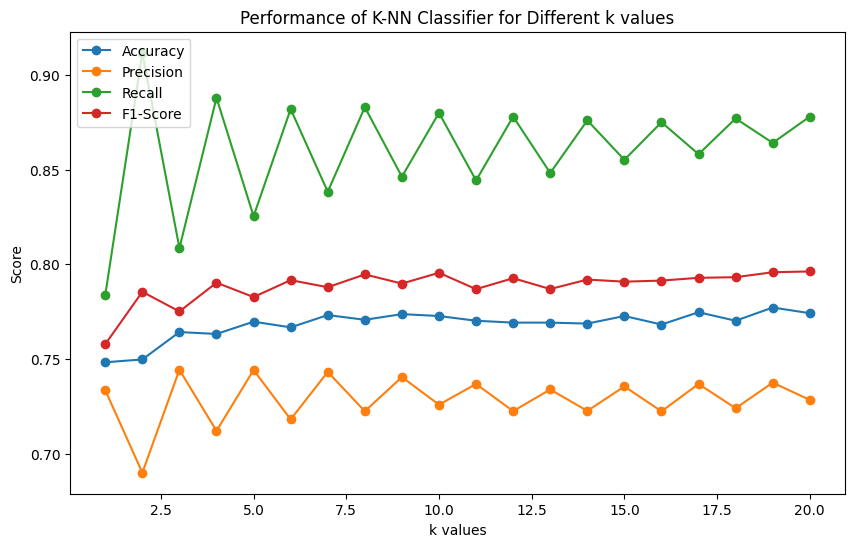

In [23]:

plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_values, label='Accuracy', marker='o')
plt.plot(k_values, precision_values, label='Precision', marker='o')
plt.plot(k_values, recall_values, label='Recall', marker='o')
plt.plot(k_values, f1_values, label='F1-Score', marker='o')
plt.xlabel('k values')
plt.ylabel('Score')
plt.title('Performance of K-NN Classifier for Different k values')
plt.legend()
plt.show()